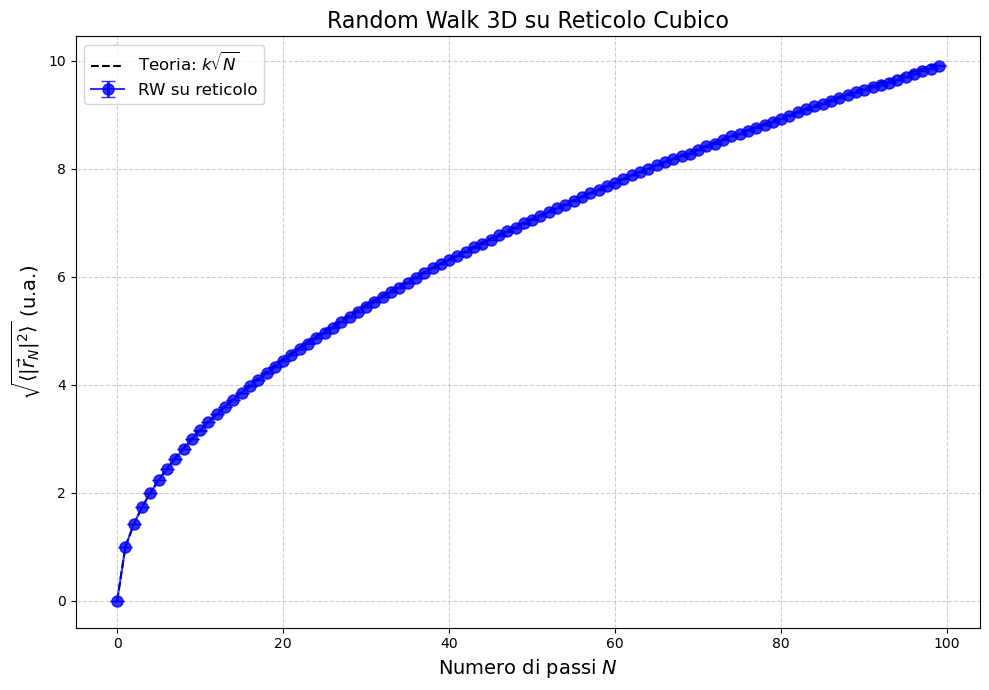

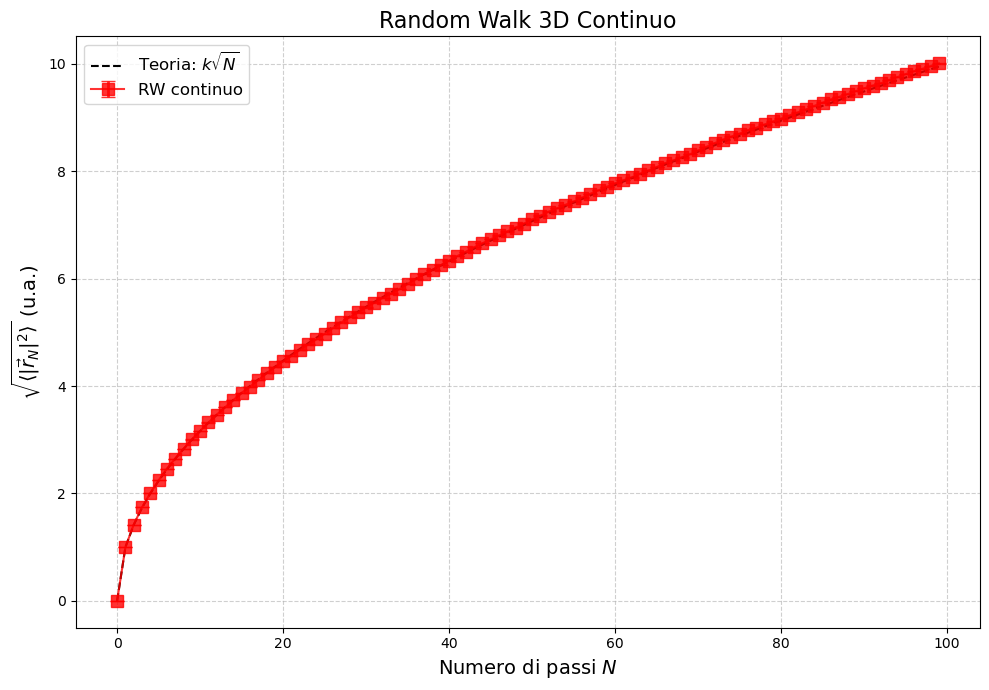

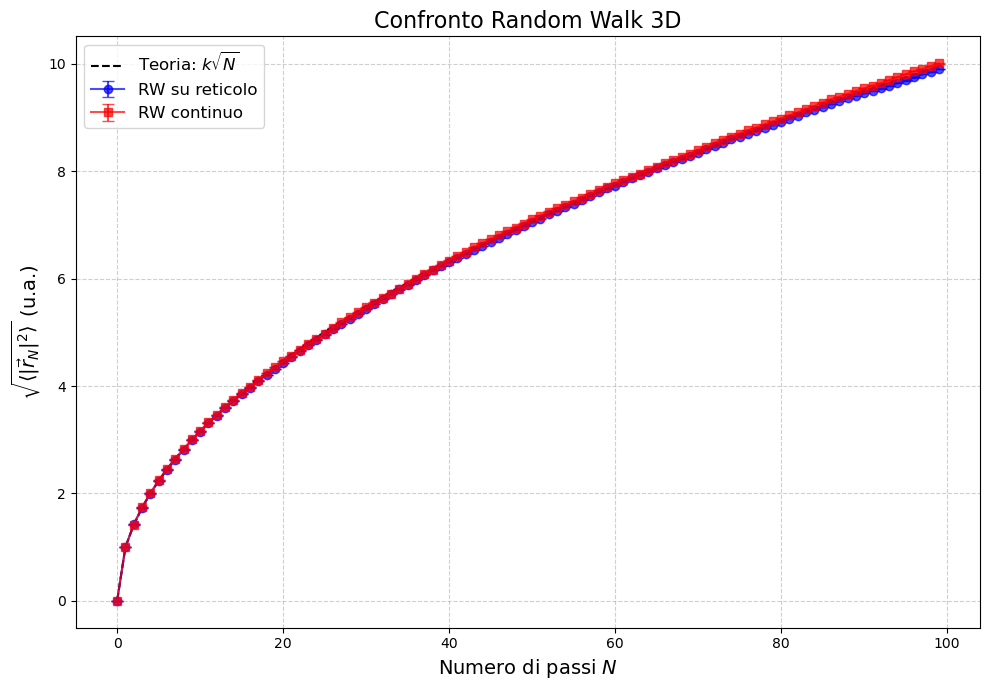

In [1]:
import numpy as np  # Importa la libreria per operazioni numeriche efficienti
import matplotlib.pyplot as plt  # Importa la libreria per la creazione di grafici

# CARICAMENTO DATI
# ================

# Funzione: np.loadtxt()
# Scopo: Caricare dati da file di testo in array NumPy
# Parametri: Nome file (assicurarsi che i file esistano nel percorso corretto)
data_lattice = np.loadtxt("Es02.2ret.txt")   # Dati per il RW su reticolo
data_continuum = np.loadtxt("Es02.2con.txt") # Dati per il RW continuo

# ESTRAZIONE DATI
# ===============

# Per RW su reticolo:
N_steps = data_lattice[:, 0]      # Colonna 0: numero di passi
r_lattice = data_lattice[:, 1]    # Colonna 1: sqrt(<|r_N|²>)
err_lattice = data_lattice[:, 2]  # Colonna 2: incertezza statistica

# Per RW continuo:
r_continuum = data_continuum[:, 1]    # Colonna 1: sqrt(<|r_N|²>)
err_continuum = data_continuum[:, 2]  # Colonna 2: incertezza statistica

# PRIMO GRAFICO: RANDOM WALK SU RETICOLO
# ======================================

# Funzione: plt.figure()
# Scopo: Creare una nuova figura per il grafico
# Parametri: figsize=(larghezza, altezza) in pollici
plt.figure(figsize=(10, 7))

# Funzione: plt.errorbar()
# Scopo: Creare un grafico con barre d'errore
# Parametri:
#   N_steps: valori x (numero di passi)
#   r_lattice: valori y (distanza quadratica media)
#   yerr=err_lattice: ampiezze barre d'errore verticali
#   fmt='o-': formato punti cerchiati con linea continua
#   capsize=5: dimensione delle estremità delle barre d'errore
#   elinewidth=2: spessore delle barre d'errore
#   markersize=8: dimensione dei marcatori
#   color="blue": colore della linea e dei punti
#   alpha=0.8: trasparenza (0.0 = trasparente, 1.0 = opaco)
#   label: etichetta per la legenda
plt.errorbar(
    N_steps, 
    r_lattice, 
    yerr=err_lattice, 
    fmt='o-', 
    capsize=5, 
    elinewidth=2,
    markersize=8,
    color="blue",
    alpha=0.8,
    label="RW su reticolo"
)

# Teoria del cammino casuale
# Scopo: Aggiungere una curva teorica per confronto
# Parametri: 
#   N_steps: valori x
#   k*np.sqrt(N_steps): valori y della curva teorica
#   '--': stile linea tratteggiata
#   color='black': colore linea
#   label: etichetta per la legenda
k = 1.0  # Coefficiente per il fit teorico
plt.plot(
    N_steps, 
    k * np.sqrt(N_steps), 
    '--', 
    color='black', 
    label=r'Teoria: $k\sqrt{N}$'
)

# Configurazione assi e titolo
plt.xlabel("Numero di passi $N$", fontsize=14)  # Etichetta asse x
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}$ (u.a.)", fontsize=14)  # Etichetta asse y
plt.title("Random Walk 3D su Reticolo Cubico", fontsize=16)  # Titolo grafico

plt.legend(fontsize=12)  # Visualizza legenda
plt.grid(True, linestyle='--', alpha=0.6)  # Griglia tratteggiata semi-trasparente
plt.tight_layout()  # Ottimizza gli spazi

# SECONDO GRAFICO: RANDOM WALK CONTINUO
# ====================================

plt.figure(figsize=(10, 7))  # Crea una nuova figura

plt.errorbar(
    N_steps, 
    r_continuum, 
    yerr=err_continuum, 
    fmt='s-',  # Quadrati con linea continua
    capsize=5, 
    elinewidth=2,
    markersize=8,
    color="red",
    alpha=0.8,
    label="RW continuo"
)

# Curva teorica
plt.plot(
    N_steps, 
    k * np.sqrt(N_steps), 
    '--', 
    color='black', 
    label=r'Teoria: $k\sqrt{N}$'
)

plt.xlabel("Numero di passi $N$", fontsize=14)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}$ (u.a.)", fontsize=14)
plt.title("Random Walk 3D Continuo", fontsize=16)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# TERZO GRAFICO: CONFRONTO DIRETTO
# ================================

plt.figure(figsize=(10, 7))

# RW reticolo
plt.errorbar(
    N_steps, 
    r_lattice, 
    yerr=err_lattice, 
    fmt='o-', 
    capsize=4, 
    markersize=6,
    color="blue",
    alpha=0.7,
    label="RW su reticolo"
)

# RW continuo
plt.errorbar(
    N_steps, 
    r_continuum, 
    yerr=err_continuum, 
    fmt='s-', 
    capsize=4, 
    markersize=6,
    color="red",
    alpha=0.7,
    label="RW continuo"
)

# Curva teorica
plt.plot(
    N_steps, 
    k * np.sqrt(N_steps), 
    '--', 
    color='black', 
    label=r'Teoria: $k\sqrt{N}$'
)

plt.xlabel("Numero di passi $N$", fontsize=14)
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle}$ (u.a.)", fontsize=14)
plt.title("Confronto Random Walk 3D", fontsize=16)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# VISUALIZZAZIONE FINALE
# ======================
plt.show()

## Analisi del Random Walk 3D

I grafici mostrano il comportamento della distanza quadratica media $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ in funzione del numero di passi $N$ per due tipi di Random Walk (RW) in 3D.

### 🔍 Comportamento fondamentale
- **Crescita diffusa**: 
  Entrambi i RW mostrano una crescita della distanza media proporzionale a $\sqrt{N}$, caratteristica dei processi diffusivi:
  $$
  \sqrt{\langle r_N^2 \rangle} \propto \sqrt{N}
  $$
  
- **Conferma teoria**: 
  La curva tratteggiata $k\sqrt{N}$ si sovrappone bene ai dati sperimentali, confermando il comportamento diffusivo.

### ⚖️ Confronto tra reticolo e continuo
1. **RW su reticolo cubico**:
   - I passi sono vincolati alle direzioni assiali (x,y,z)
   - Minore libertà di movimento
   - La distanza media è leggermente inferiore rispetto al caso continuo
   - Coefficiente $k \approx 1$ (per passo unitario)

2. **RW continuo**:
   - Direzioni completamente casuali nello spazio 3D
   - Maggiore libertà di esplorazione
   - Distanza media leggermente superiore
   - Coefficiente $k \approx 1$ (stesso valore del caso reticolare)

### 📈 Analisi statistica
- **Barre d'errore**:
  Rappresentano l'incertezza statistica (deviazione standard della media). 
  Diminuiscono all'aumentare di $N$ come $1/\sqrt{M}$ dove $M$ è il numero di cammini simulati.
  
- **Precisione**:
  Con $M \sim 10^4$ simulazioni, l'incertezza è sufficientemente piccola da distinguere chiaramente il comportamento diffusivo.

### 💡 Interpretazione fisica
1. **Moto browniano**:
   I RW modellano il movimento di particelle in sospensione (moto browniano) dove:
   $$
   \langle r^2 \rangle = 2dDt
   $$
   con $d$ = dimensioni, $D$ = coefficiente di diffusione, $t$ = tempo.

2. **Universalità**:
   Il comportamento $\sqrt{\langle r_N^2 \rangle} \propto \sqrt{N}$ è universale e indipendente dai dettagli microscopici.



### 🧪 Conclusioni
1. Entrambi i RW mostrano chiaramente comportamento diffusivo
2. La libertà direzionale nel caso continuo produce distanze medie leggermente maggiori
3. Il modello teorico $k\sqrt{N}$ descrive eccellentemente i dati sperimentali
